### Import Necessary Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
from collections import Counter

### task 1: merging 12 months of sales data into a single file

In [3]:
files =[file for file in os.listdir('/kaggle/input/sales-data')]
mydata=pd.DataFrame()
for file in files:
    month_data=pd.read_csv(f'/kaggle/input/sales-data/{file}')
    mydata=pd.concat([mydata,month_data])
    
mydata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## clean up the data

### drop rows of nan

In [5]:
mydata[mydata.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mydata.dropna(inplace=True)

### drop duplicates

In [7]:
mydata.drop_duplicates(inplace=True)

### find 'Or' and delete id

In [8]:
mydata=mydata[mydata["Order Date"].str[0:2]!="Or"]

### convert columns to the correct type

In [9]:
mydata["Quantity Ordered"]=pd.to_numeric(mydata["Quantity Ordered"])  # make int
mydata["Price Each"]=pd.to_numeric(mydata["Price Each"]) # make float

## augment data with additional columns

### task 2:add month column

In [10]:
mydata["month"]=mydata["Order Date"].str[0:2]
mydata["month"]=mydata["month"].astype("int32") 
mydata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


### task 3: add a sales column

In [11]:
mydata["sales"]=mydata["Quantity Ordered"]*mydata["Price Each"]
mydata.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99


### task 4:add city column

In [12]:
def extract_cities(address):
    list_cities=[]
    address=address.values.reshape(1,-1)[0]
    for one_address in address:
        city=one_address.split(",")[1].strip()
        state=one_address.split(",")[2].strip().split(" ")[0]
        list_cities.append(f"{city} ({state})")
    return list_cities    
    
address=mydata[["Purchase Address"]]
city=extract_cities(address)

In [13]:
mydata["city"]=city
mydata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY)


In [14]:
# # ## another way to solve this problem
# def get_state(address):
#     return address.split(",")[2].strip()[:2]
# def get_city(address):
#     return address.split(",")[1].strip()
# mydata["city"]=mydata["Purchase Address"].apply(lambda x:get_city(x))

#### there are an issue in our new column because we have overlap in cities because there are more than county that have the same name of city,for example portland city to solve that we should also grab the state

## Question 1: what was the best month for sales? how much was earned that month?

In [15]:
sales_per_month=mydata.groupby("month").agg({"sales":"sum"}).sort_values(by="sales",ascending=False)
sales_per_month

,sales
month,
12,4608295.70
10,3734777.86
4,3389217.98
11,3197875.05
5,3150616.23
3,2804973.35
7,2646461.32
6,2576280.15
8,2241083.37


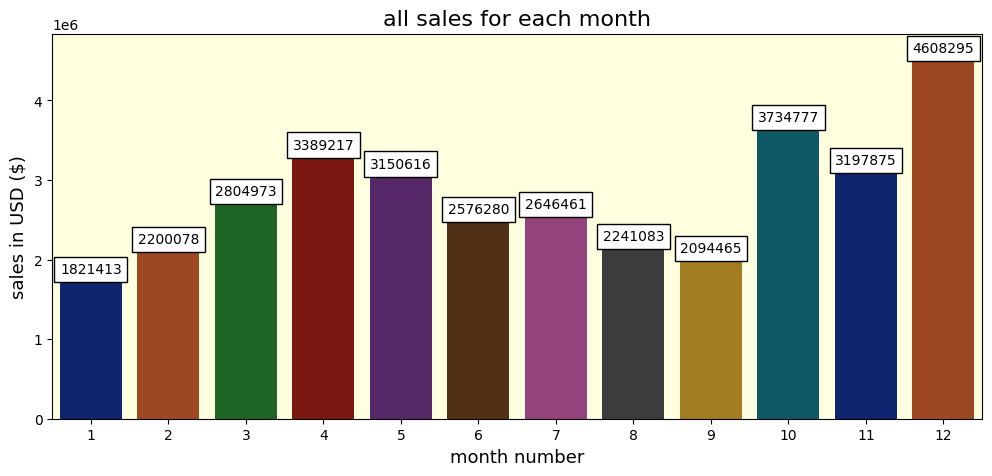

In [16]:
palette_color = sns.color_palette('dark')
plt.figure(figsize=(12,5))
monthes=sales_per_month.index
ax=sns.barplot(x=monthes,y=sales_per_month.sales,palette=palette_color)
ax.set_xlabel("month number",fontsize=13)
ax.set_ylabel("sales in USD ($)",fontsize=13)
ax.set_title("all sales for each month",fontsize=16)
for p in ax.patches:
    ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox=dict(facecolor="white",
                        edgecolor="black")
             )
plt.gca().set_facecolor("lightyellow")
plt.show()

#### in the month of December why would we do so much better in December if we kind of think about the holidays the big think in December is chrismas(as a muslim we do not believe in it)

## Question 2:what city had the highest number of sales?

In [17]:
results=mydata.groupby("city").count()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
city,,,,,,,,
Atlanta (GA),14863,14863,14863,14863,14863,14863,14863,14863
Austin (TX),9890,9890,9890,9890,9890,9890,9890,9890
Boston (MA),19901,19901,19901,19901,19901,19901,19901,19901
Dallas (TX),14797,14797,14797,14797,14797,14797,14797,14797
Los Angeles (CA),29564,29564,29564,29564,29564,29564,29564,29564
New York City (NY),24847,24847,24847,24847,24847,24847,24847,24847
Portland (ME),2451,2451,2451,2451,2451,2451,2451,2451
Portland (OR),9998,9998,9998,9998,9998,9998,9998,9998
San Francisco (CA),44662,44662,44662,44662,44662,44662,44662,44662


### and if you noticed there are two kind of portland city

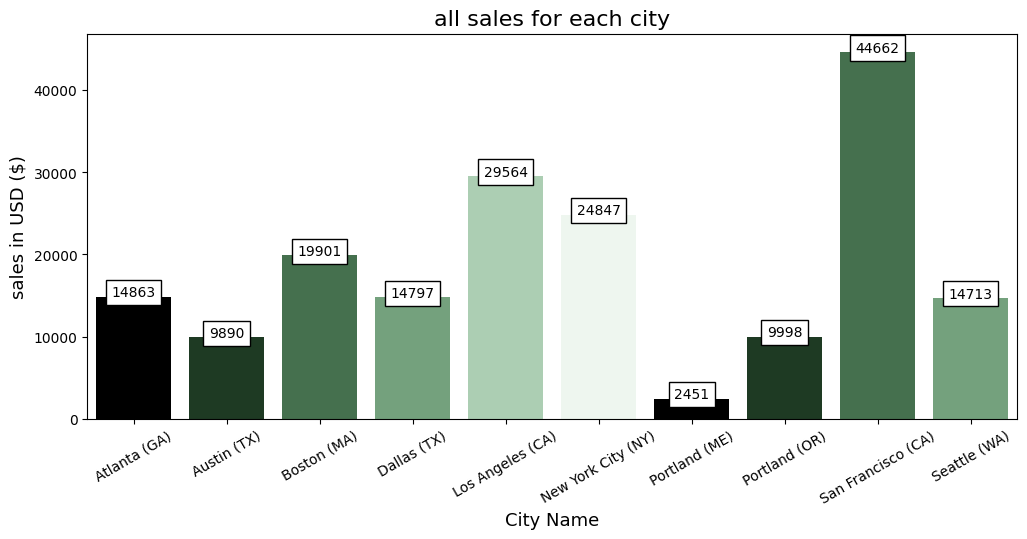

In [18]:
palette_color = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True)

plt.figure(figsize=(12,5))
cities=results.index
ax=sns.barplot(x=cities,y=results["sales"],palette=palette_color)
ax.set_xlabel("City Name",fontsize=13)
ax.set_ylabel("sales in USD ($)",fontsize=13)
ax.set_title("all sales for each city",fontsize=16)
for p in ax.patches:
    ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox=dict(facecolor="white",
                        edgecolor="black")
             )
plt.gca().set_facecolor("white")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### now as a data scientist i might ask myself some questions for example why is san francisco so much higher  than the other places

## Question 3:what time should we display advertisements to maximize likelihood of customer's buying product?

In [19]:
mydata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY)


#### if we are going to use this data to answer this question we're gonna really need to look at (order date) feature that in the data we're gonna basically need to figure out a way that we can kind of aggregate all of the order dates into there like distribution over a 24-hour period

In [20]:
mydata["Order Date"]=pd.to_datetime(mydata["Order Date"])

In [21]:
mydata["hour"]=mydata["Order Date"].dt.hour
mydata["minute"]=mydata["Order Date"].dt.minute
mydata.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14,40


In [22]:
results=mydata.groupby("hour").agg({"sales":"count"}).reset_index()
results.head()

,hour,sales
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852


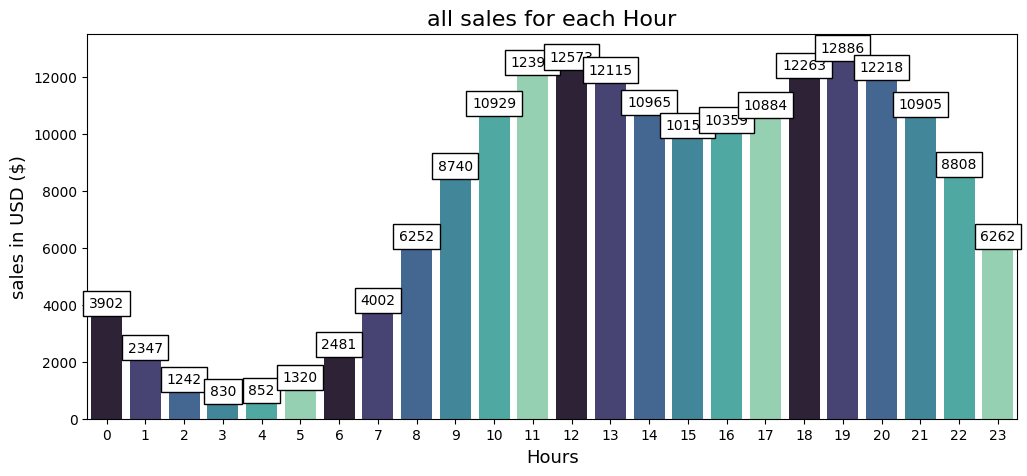

In [23]:
hours=results.index
palette_color = sns.color_palette("mako")
plt.figure(figsize=(12,5))
ax=sns.barplot(x=hours,y=results["sales"],palette=palette_color)
ax.set_xlabel("Hours",fontsize=13)
ax.set_ylabel("sales in USD ($)",fontsize=13)
ax.set_title("all sales for each Hour",fontsize=16)
for p in ax.patches:
    ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox=dict(facecolor="white",
                        edgecolor="black")
             )
plt.gca().set_facecolor('white')
plt.show()

### let us show it as a line chart

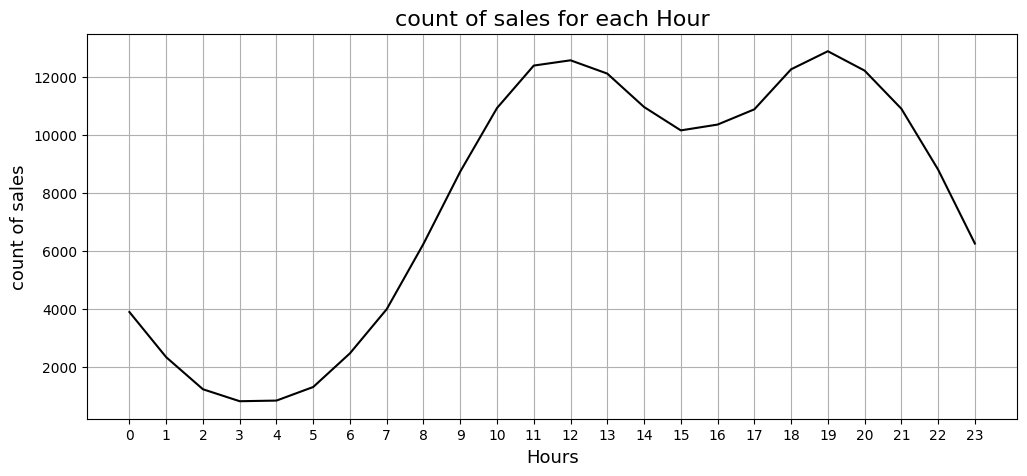

In [24]:
plt.figure(figsize=(12,5))
ax=sns.lineplot(x=hours,y=results["sales"],color="black")
ax.set_xlabel("Hours",fontsize=13)
ax.set_ylabel("count of sales",fontsize=13)
ax.set_title("count of sales for each Hour",fontsize=16)
plt.xticks(hours)
plt.grid()
plt.show()
# my recommendation is around 11am (11) or 7pm (19)

## Question 4: what products are most often sold together

In [27]:
# if the products have the same order id then that means the products were ordered together 
mydata[mydata["Order ID"]=="176560"].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38


In [41]:
df=mydata[mydata["Order ID"].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco (CA),20,12
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco (CA),20,12
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco (CA),9,28
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco (CA),9,28
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City (NY),10,17


In [42]:
df["grouped"]=df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))
df=df[["Order ID","grouped"]].drop_duplicates()
df.head()

,Order ID,grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"


In [53]:
count=Counter()
for row in df["grouped"]:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

## Question 5: what product sold the most? why do you think is sold the most?

In [63]:
product_group=mydata.groupby("Product")
quantity_ordered=product_group.agg({"Quantity Ordered":"sum"})
quantity_ordered

,Quantity Ordered
Product,
20in Monitor,4126
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
34in Ultrawide Monitor,6192
AA Batteries (4-pack),27615
AAA Batteries (4-pack),30986
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
Flatscreen TV,4813


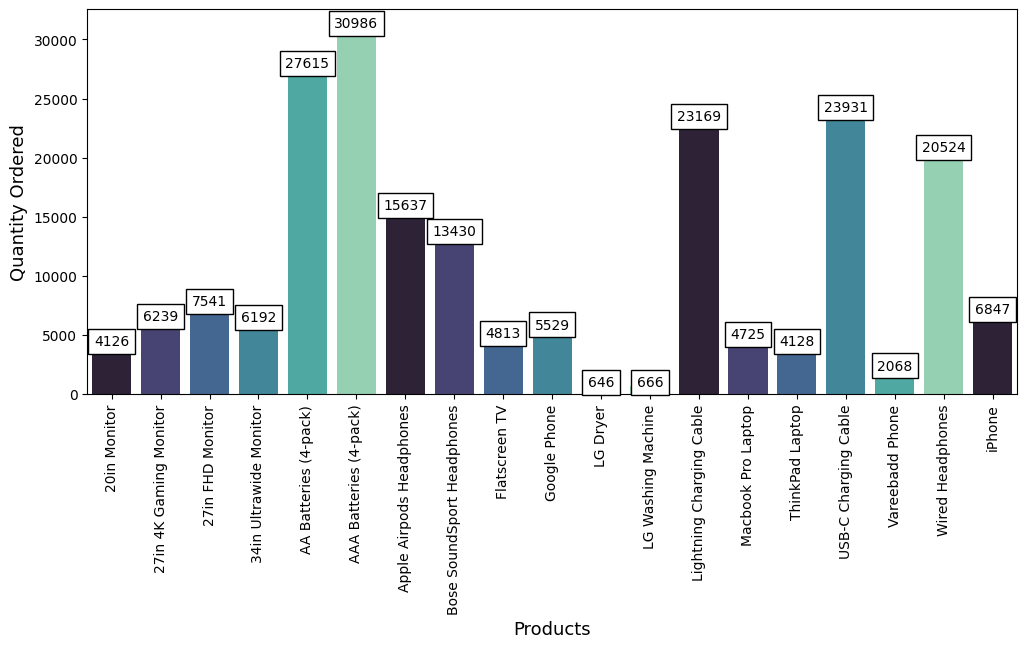

In [68]:
## i think the most command products and the cheapest products was the most sold  
products=quantity_ordered.index
palette_color = sns.color_palette("mako")
plt.figure(figsize=(12,5))
ax=sns.barplot(x=products,y=quantity_ordered["Quantity Ordered"],palette=palette_color)
ax.set_xlabel("Products",fontsize=13)
ax.set_ylabel("Quantity Ordered",fontsize=13)
for p in ax.patches:
    ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox=dict(facecolor="white",
                        edgecolor="black")
             )
plt.gca().set_facecolor('white')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### we want to overlay the prices of each product into the chart that we did in the last

In [77]:
prices=mydata.groupby("Product").agg({"Price Each":"mean"})
prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


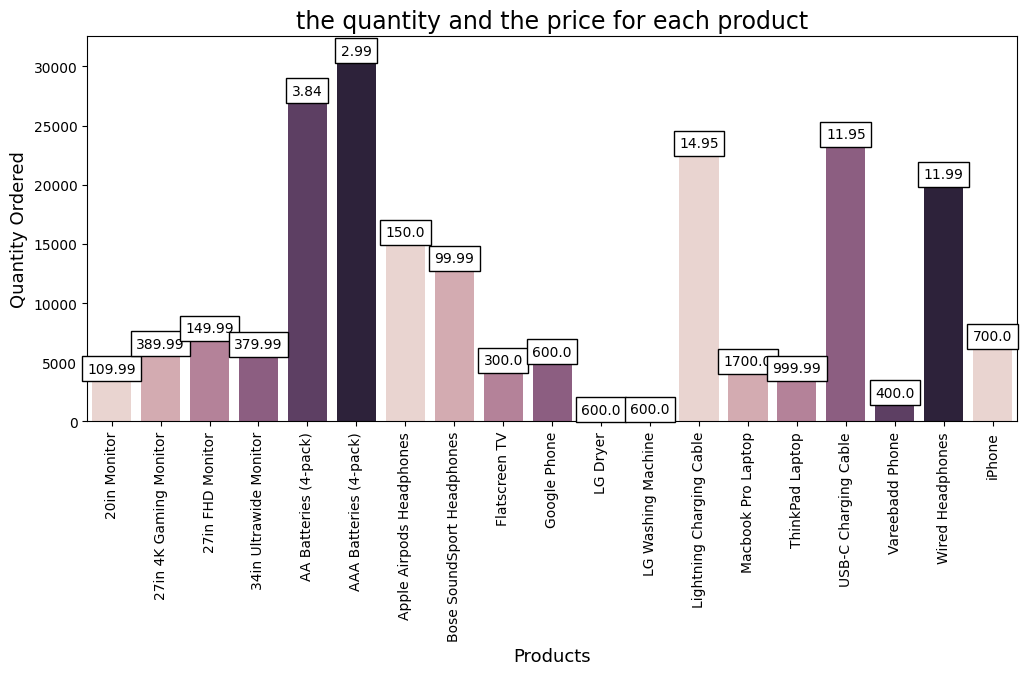

In [85]:
prices_of_products=prices["Price Each"]
products=quantity_ordered.index
palette_color = sns.cubehelix_palette()
plt.figure(figsize=(12,5))
ax=sns.barplot(x=products,y=quantity_ordered["Quantity Ordered"],palette=palette_color)
ax.set_xlabel("Products",fontsize=13)
ax.set_ylabel("Quantity Ordered",fontsize=13)
ax.set_title("the quantity and the price for each product",fontsize=17)
c=0
for p in ax.patches:
    ax.annotate(round(prices_of_products[c],2),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox=dict(facecolor="white",
                        edgecolor="black")
             )
    c+=1
plt.gca().set_facecolor('white')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()